**Финальный проект**

**Банки - сегментация пользователей по потреблению**
_____
**Описание исследования.**
    Необходимо проанализировать клиентов регионального банка, сегментировать их по количеству потребляемых продуктов, проанализировать отток клиентов. 
_____
**Цель исследования.**
    Провести исследование данных о клиентах банка, с целью составления портрета клиентов, склонных уходить из банка.
   
_____
**Задачи исследования.**

Необходимо провести предобработку данных, исследовать данные, провести сегментацию клиенов по группам, сформулировать и проверить статистические гипоезы.
_____
**Исходные данные.**
    
     Описание данных
     Путь к файлу: /datasets/bank_scrooge.csv.
     Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.
     Колонки:

    USERID — идентификатор пользователя,
    score — баллы кредитного скоринга,
    city —	город,
    gender —	пол,
    age —	возраст,
    equity —	количество баллов собственности
    balance —	баланс на счёте,
    products — количество продуктов, которыми пользуется клиент,
    credit_card — есть ли кредитная карта,
    last_activity— активный клиент,
    EST_SALARY — оценочный доход клиента,
    churn — признак оттока.

     Данное исследование разделим на несколько частей.
 
***Часть 1. Загрузка и подготовка данных:***
* [1. Загрузка данных ](#1-bullet)
* [2. Проверка и исследование пропусков в данных ](#2-bullet)
* [3. Изменение типов данных ](#3-bullet)
* [4. Проверка и обработка дубликатов ](#4-bullet)
* [5. Создание столбцов с кодировкой категориальных признаков ](#5-bullet)

***Часть 2. Исследовательский анализ данных:***
* [1. Расчет ключевых показателей метрик.](#6-bullet)
* [2. Исследование оттока в разрезе метрик.](#7-bullet)
* [3. Визуализация распределения по категориальным метрикам.](#8-bullet)
* [4. Построение гистограмм распределения непрерывных метрик.](#9-bullet)
* [5. Корреляционнный анализ метрик.](#10-bullet)
* [6.Выбор наиболее значимых метрик.](#11-bullet)

***Часть 3. Проверка статистических гипотез:***
* [1. Гипотеза различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним..](#12-bullet)
* [2. Гипотеза различия баллов кредитного скоринга между теми клиентами, которые ушли и теми, что остались.](#13-bullet)

***[Часть 4. Промежуточные итоги.](#14-bullet)***

***Часть 5. Сегментация клиентов:***
* [1. Выбор метрик для сегментациию.](#15-bullet)
* [2. Разделение клиентов по сегментам.](#16-bullet)
* [3. Расчет основных метрик по сегментам.](#17-bullet)

***[Часть 6. Выводы и рекомендации.](#18-bullet)***

***[Часть 7. Презентация.](#19-bullet)***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from statistics import variance 
import math as mth
import plotly.express as px

#### Часть 1. Загрузка и подготовка данных

<a id = '1-bullet'></a>
##### Загрузка данных.

In [2]:
try:
    data = pd.read_csv('/datasets/bank_scrooge.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [3]:
# выведем первые несколько строк датафрейма
data.sample(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
2773,116693,846.0,Ярославль,М,47.0,0,177948.28,1,1,0,141050.98,0
2188,201803,834.0,Ярославль,М,25.0,4,318553.01,2,1,0,55444.58,0
1865,225724,793.0,Ярославль,Ж,37.0,2,708658.00,2,1,0,221893.58,0
143,198181,958.0,Ярославль,М,34.0,3,5763239.76,2,1,1,920730.06,1
4930,174354,789.0,Ростов,Ж,39.0,3,177945.72,1,0,1,189807.41,0
2465,221061,867.0,Ярославль,Ж,47.0,5,673257.77,2,1,0,62866.14,0
7931,191520,767.0,Ярославль,М,45.0,0,NaN,1,1,1,880005.05,0
448,208076,810.0,Ярославль,М,47.0,3,437987.04,2,1,0,103530.61,0
7338,115876,917.0,Рыбинск,Ж,42.0,5,1087530.17,2,1,1,161518.73,0
6327,208108,893.0,Ростов,М,53.0,0,NaN,1,1,1,220700.56,0


<a id = '2-bullet'></a>
##### Исследование пропусков в данных.

In [4]:
# измененим названия столбцов
data = data.rename(columns={
    'USERID': 'user_id', 'EST_SALARY': 'est_salary'})

In [5]:
data.isna().sum() # проверка пропусков в столбцах

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Пропуски находятся в столбцах с возрастом и балансом. Возраст мог быть не заполнен самим клиентом. Удалим строки с незаполненным возрастом 

In [7]:
data = data.dropna(subset=['age'])

In [8]:
#выведем данные с незаполненным балансом
data.loc[ data['balance'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.0,Ростов,М,38.0,0,NaN,1,0,0,171763.69,0
9984,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0
9993,219924,884.0,Рыбинск,Ж,36.0,0,NaN,1,1,1,169844.88,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0


In [9]:
# посмотрим какие данные имеют незаполненный баланс
data.loc[ data['balance'].isna()].describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2279.000000,2279.000000,2279.000000,2279.000000,0.0,2279.000000,2279.000000,2279.000000,2.279000e+03,2279.000000
mean,171904.885915,865.357174,42.093023,0.051338,NaN,1.163229,0.815270,0.548925,2.263454e+05,0.005704
std,33303.215270,89.553735,11.941551,0.226623,NaN,0.403713,0.388164,0.497710,1.998256e+05,0.075327
min,114182.000000,642.000000,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,142992.500000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.202174e+05,0.000000
50%,172304.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.743479e+05,0.000000
75%,201257.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.403728e+05,0.000000
max,229145.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000


In [10]:
#создадим столбец классификатор, если баланс не заполнен =0
data['balance_nan'] = np.where(data['balance'].isnull(), 0,1)

Возможно пропуски это 0 на балансе, т.к. у таких записей баллы собственности и количество потребляемых продуктов 1-3, большинство этих клиентов имеют кредитную карту и являются активными клиентами, поэтому оставим эти пропуски как есть.

 Сравним данные с пропуском в столбце с балансом и без 


In [11]:
# посмотрим какие данные имеют заполненный баланс
data.loc[ data['balance_nan']==1].describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan
count,7695.000000,7695.000000,7695.000000,7695.000000,7.695000e+03,7695.000000,7695.000000,7695.000000,7.695000e+03,7695.000000,7695.0
mean,171710.892268,843.744120,42.924366,3.394802,8.272456e+05,2.081222,0.640156,0.515140,1.245204e+05,0.234698,1.0
std,33812.862444,55.342539,12.244010,1.584817,1.980327e+06,0.757446,0.479986,0.499803,1.046671e+05,0.423837,0.0
min,94561.000000,689.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000,1.0
25%,142638.000000,801.000000,33.000000,2.000000,2.956987e+05,2.000000,0.000000,0.000000,6.755698e+04,0.000000,1.0
50%,172710.000000,840.000000,40.000000,4.000000,5.242953e+05,2.000000,1.000000,1.000000,1.062502e+05,0.000000,1.0
75%,201145.500000,882.000000,52.000000,5.000000,9.800512e+05,2.000000,1.000000,1.000000,1.551446e+05,0.000000,1.0
max,229136.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.0


In [12]:
# выведем значения среднего и медианы по признакам для ушедших клиентов с балансом и без.
data[['score', 'age', 'equity', 'products', 'est_salary']].groupby(data['balance_nan']).agg(
    ['mean', 'median']).round()

score          age        equity        products         \
              mean median  mean median   mean median     mean median   
balance_nan                                                            
0            865.0  903.0  42.0   40.0    0.0      0      1.0      1   
1            844.0  840.0  43.0   40.0    3.0      4      2.0      2   

            est_salary            
                  mean    median  
balance_nan                       
0             226345.0  174348.0  
1             124520.0  106250.0

In [13]:
#выведем среднее по бинарным столбцам, оно будет равно доле
data[['credit_card', 'last_activity', 'churn']].groupby(
    data['balance_nan']).agg(['mean'])

,credit_card,last_activity,churn
,mean,mean,mean
balance_nan,,,
0,0.815270,0.548925,0.005704
1,0.640156,0.515140,0.234698


In [14]:
data.groupby(data['city'])['balance_nan'].agg(['mean'])

,mean
city,
Ростов,0.834040
Рыбинск,0.781588
Ярославль,0.751830


In [15]:
data.groupby(data['gender'])['balance_nan'].agg(['mean'])

,mean
gender,
Ж,0.797913
М,0.745141


Распределение данных в разрезе различных признаков с заполненным балансом и без отличаются. У данных с незаполненным балансом выше баллы кредитного скоринга, а среднее по баллам собственности в среднем = 0, показатели по доходу выше у данных с незаполненным балансом. При этом отток среди клиентов с незаполненным балансом менее 1%. 

<a id = '3-bullet'></a>
##### Изменение типов данных.

In [16]:
# приведем столбцы к более удобному типу данных
data['score'] = data['score'].astype(int)
data['age'] = data['age'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
 12  balance_nan    9974 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1.3+ MB


<a id = '4-bullet'></a>
##### Проверка и обработка дубликатов в данных.

In [17]:
#проверка явных дубликатов
data.duplicated().sum()

0

In [18]:
data['user_id'].duplicated().sum()

50

In [19]:
# выведем строки с дубликатами, для этого составим список из номеров повторяющихся идентификаторов
list_duplicate = data[data['user_id'].duplicated()]['user_id'].tolist()
data.query('user_id in @list_duplicate').sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1,1
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1,1
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0,0
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,220816,934,Рыбинск,Ж,74,5,1294285.39,3,1,0,95606.80,0,1
2597,226719,990,Ярославль,М,37,4,14648692.14,2,0,0,934412.61,1,1
4216,226719,903,Рыбинск,Ж,63,0,NaN,1,1,0,138582.58,0,0
8205,227795,840,Рыбинск,М,34,2,350768.03,1,1,0,102036.14,1,1


Видимо тут явно произошла техническая ошибка, возможно на место ушедших клиентов записали новых клиентов с тем же ID, у дубликатов так же стоят разные города, возможно счетчик ID наложился в разных городах. Оставим их как есть.

<a id = '5-bullet'></a>
##### Создание столбцов с кодировкой категориальных признаков.

In [20]:
data_copy = data.copy()
data = pd.get_dummies(data, columns=['gender', 'city'], dtype=int)
data['city'] = data_copy['city'] 
data['gender'] = data_copy['gender']

In [21]:
data.sample(10)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль,city,gender
8744,225903,916,63,5,869796.53,2,0,1,44656.96,0,1,1,0,0,1,0,Рыбинск,Ж
9231,214215,919,35,5,3728118.06,2,0,0,258537.72,1,1,0,1,0,0,1,Ярославль,М
9832,166197,888,66,3,352561.70,2,1,1,43462.54,0,1,1,0,0,0,1,Ярославль,Ж
4466,128693,903,31,0,NaN,1,1,1,133975.33,0,0,0,1,0,0,1,Ярославль,М
3542,188228,775,51,0,72893.67,1,1,1,137732.25,0,1,1,0,0,1,0,Рыбинск,Ж
9648,154625,890,40,5,910708.10,2,1,0,150356.03,0,1,0,1,0,0,1,Ярославль,М
2744,219934,810,24,1,343919.71,2,1,1,105292.77,1,1,0,1,0,1,0,Рыбинск,М
3491,216842,811,25,3,112896.03,3,1,0,10685.64,0,1,1,0,0,1,0,Рыбинск,Ж
4264,203948,869,39,2,981833.14,1,1,1,152180.64,0,1,1,0,0,1,0,Рыбинск,Ж
3826,122340,823,30,4,602623.09,2,0,0,99178.05,0,1,1,0,0,0,1,Ярославль,Ж


ВЫВОД: сделали выгрузку датафрейма, провели проверку на наличие пропусков и дубликатов. Выявили большое количество пропусков в столбце баланс, возможно это означает нулевой баланс, оставим пропуски как есть. Также обнаружили небольшое количество незаполненных данных в колонке возраста, заполнили их 0. И небольшое количество дубликатов идентификатора, скорее всего возникшие из-за технических ошибок. Так же создали столбцы для кодировки категориальных признаков - пол и город. 

#### Часть 2. Исследовательский анализ данных

<a id = '6-bullet'></a>
##### Расчет ключевых показателей метрик.

In [22]:
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль
count,9974.000000,9974.000000,9974.000000,9974.000000,7.695000e+03,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000
mean,171755.218669,848.682575,42.734409,2.630840,8.272456e+05,1.871466,0.680168,0.522859,1.477868e+05,0.182374,0.771506,0.499599,0.500401,0.141969,0.268999,0.589031
std,33695.527126,65.399720,12.179971,1.979965,1.980327e+06,0.792729,0.466435,0.499502,1.392855e+05,0.386172,0.419884,0.500025,0.500025,0.349036,0.443462,0.492034
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142760.000000,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.525166e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172643.000000,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.196268e+05,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,201163.750000,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.744998e+05,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#Выведем отдельно средние по непрерывным признакам
data[['score', 'age', 'equity', 'balance', 'products', 'est_salary']].agg(['mean', 'median']).round()

,score,age,equity,balance,products,est_salary
mean,849.0,43.0,3.0,827246.0,2.0,147787.0
median,853.0,40.0,3.0,524295.0,2.0,119627.0


Процент оттока = среднее по столбцу "churn" и составляет почти 18%. Так же в датафрейме распределение клиентов по полу 50/50, клиентов из Ростова 14%, Рыбинска 27% и из Ярославля 59%. 67% клиентов имеют кредитные карты и 52% это активные клиенты. Так же у баланса и дохода достаточно сильно отличаются среднее и медианное значение, скорее всего из-за выбросов и незаполненных данных.
Рассмотрим средние и медианы признаков отдельно для ушедших клиентов и оставшихся.

<a id = '7-bullet'></a>
##### Исследование оттока в разрезе метрик.

In [24]:
# выведем значения среднего и медианы по непрерывным признакам для ушедших клиентов и оставшихся.
data[['score', 'age', 'equity', 'balance', 'products', 'est_salary']].groupby(data['churn']).agg(['mean', 'median']).round()

score          age        equity           balance           products  \
        mean median  mean median   mean median       mean    median     mean   
churn                                                                          
0      845.0    848  43.0     40    2.0      3   733032.0  475410.0      2.0   
1      863.0    866  41.0     39    4.0      4  1134458.0  783909.0      2.0   

             est_salary            
      median       mean    median  
churn                              
0          2   147675.0  118228.0  
1          2   148290.0  125395.0

Сильнее всего отличаются медианные и средние значения по балансу и доходу клиентов, поскольку на среднее имеют влияние выбросы, то скорее всего у этих двух величин они присутствуют в достаточном количестве.

In [25]:
#выведем среднее по бинарным столбцам, оно будет равно доле
data[['credit_card', 'last_activity', 'gender_Ж', 'gender_М', 'city_Ростов', 'city_Рыбинск', 'city_Ярославль']].groupby(
    data['churn']).agg(['mean'])

,credit_card,last_activity,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль
,mean,mean,mean,mean,mean,mean,mean
churn,,,,,,,
0,0.708890,0.482894,0.533047,0.466953,0.141140,0.275414,0.583446
1,0.551402,0.702034,0.349643,0.650357,0.145684,0.240242,0.614074


Проценты имеющих кредитную карту и активность отличаются среди ушедних и оставшихся клиентов, так же как и распределение по полу. Получается, что среди отточных клиентов больше мужчин и активных пользователей. А вот распределение по городам среди ушедших и оставшихся почти такое же как и по всему датафрейму. Визуализируем признаки.

<a id = '8-bullet'></a>
##### Визуализация распределения по категориальным метрикам.

In [26]:
# функция для визуализации категориальных признаков в столбчатой диаграмме
def visionbar(df, column, h):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, hue =h, data=df)
    plt.title('Распределение по признаку')
    plt.ylabel('Количество')
    plt.show()

In [27]:
# функция для визуализации нормированных гистограмм
def visionhist(df, column, h):
    plt.figure(figsize=(8, 5))
    sns.histplot(x=column, data=df, hue=h, common_norm=False, stat='density')
    plt.title('Нормированая гистограмма')
    plt.ylabel('Плотность')
    plt.show()

In [28]:
# функция для визуализации диаграмм размаха
def visionbox(df, column, h):
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=column, x=h, data=df)
    plt.title('Диаграмма размаха')
    plt.show()

In [29]:
#разобьем столбцы на категориальные и  количественные
list_cat = ['credit_card', 'last_activity', 'gender', 'city', 'balance_nan']
list_dis = ['score', 'age', 'equity', 'balance', 'products', 'est_salary']

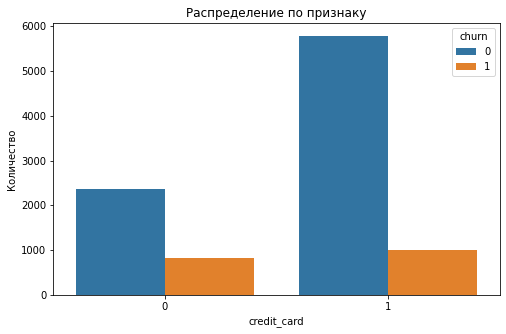

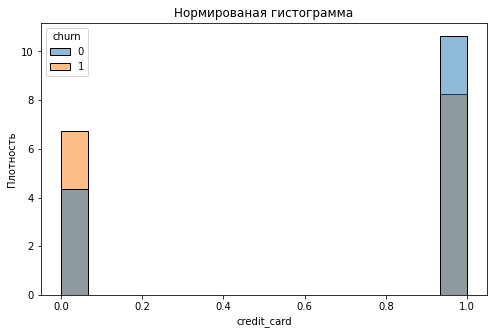

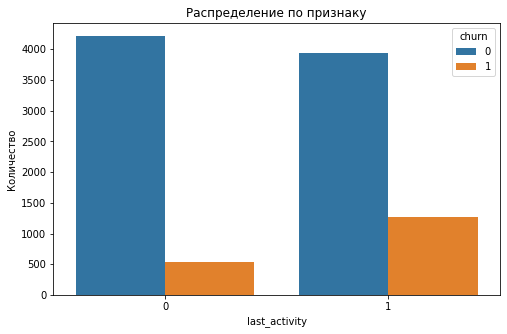

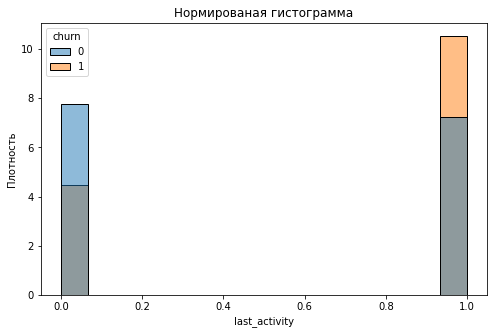

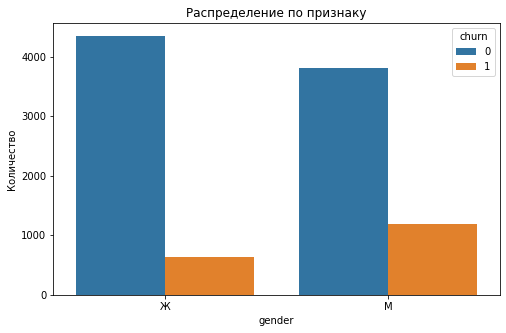

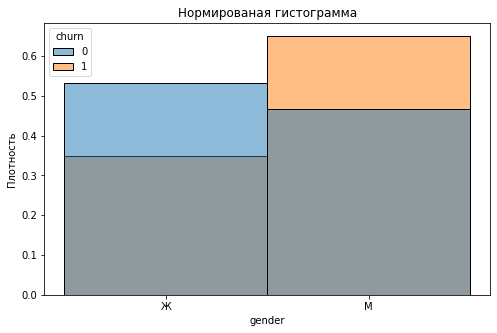

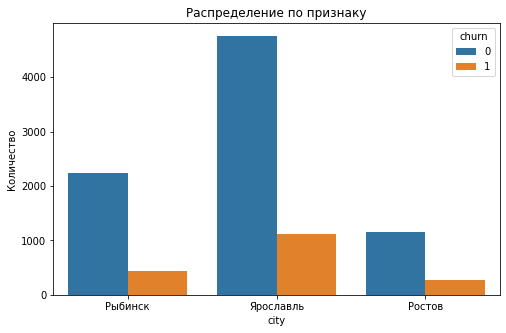

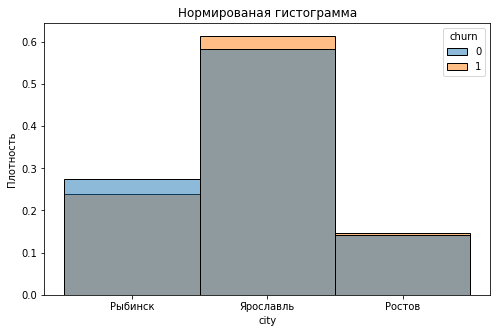

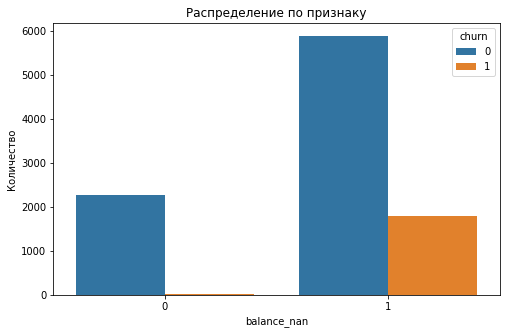

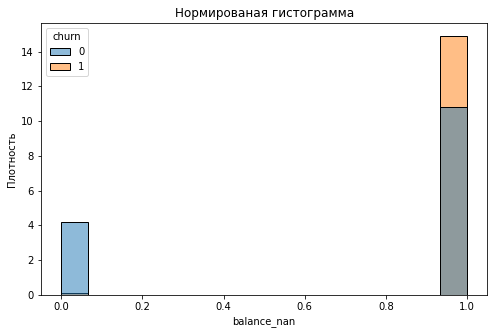

In [30]:
# построим столбчатые диаграммы  и нормированные гистограммы для категориальных признаков
for i in list_cat:
    visionbar(data, i, 'churn')
    visionhist(data, i, 'churn')

Вероятность оттока выше у клиентов не имеющих кредитных карт. Так же у активных клиентов уровень оттока выше. Среди ушедших клиентов мужчин больше, чем женщин. Больше всего ушедших из Ярославля, но и общее количество клиентов в Ярославле сильно больше по сравнению с другими городами. Среди клиентов с незаполненным балансом на счете практически нет ушедших клиентов

 Для всех дискретных признаков рассчитаем процент оттока клиентов: 


,credit_card,mean
0,0,0.255799
1,1,0.147848


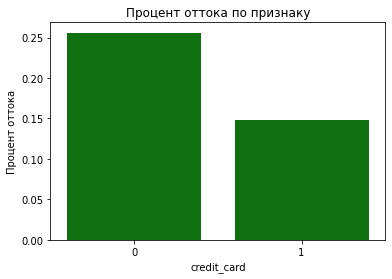

,last_activity,mean
0,0,0.113889
1,1,0.244871


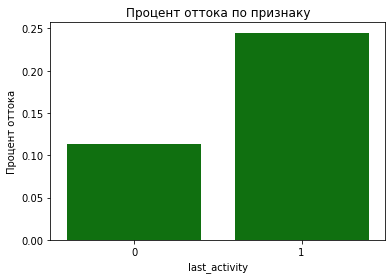

,gender,mean
0,Ж,0.127634
1,М,0.237027


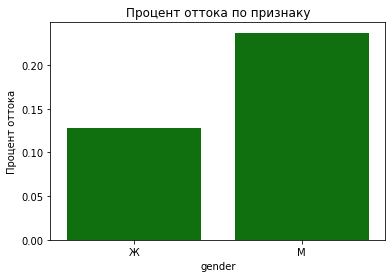

,city,mean
0,Ростов,0.187147
1,Рыбинск,0.162877
2,Ярославль,0.190128


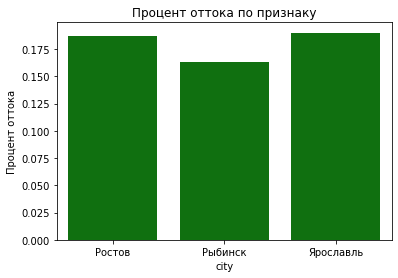

,balance_nan,mean
0,0,0.005704
1,1,0.234698


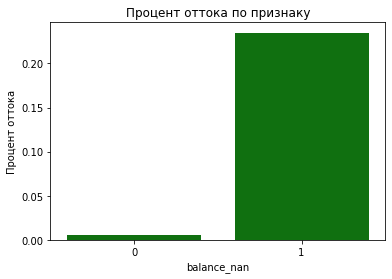

In [31]:
for i in list_cat:
    data_gr = data.groupby(data[i])['churn'].agg(['mean']).reset_index()
    display(data_gr)
    plt.figsize=(8,8)
    sns.barplot(x=i, y='mean', data=data_gr, color='green')
    plt.title('Процент оттока по признаку')
    plt.ylabel('Процент оттока')
    plt.show()

Вероятность оттока выше у клиентов не имеющих кредитных карт, всего 25% оттока против 14% у клиентов без кредитки. Так же у активных клиентов уровень оттока выше - 24%, для неактивных клиентов уровень оттока равен 11%. Уровень оттоках клиентов мужчин больше, чем женщин почти в два раза. Больше всего ушедших из Ярославля, но и общее количество клиентов в Ярославле сильно больше по сравнению с другими городами. Среди клиентов с незаполненным балансом по счету ушедших клиентов менее 1%.

<a id = '9-bullet'></a>
##### Построение гистограмм для непрерывных метрикам.

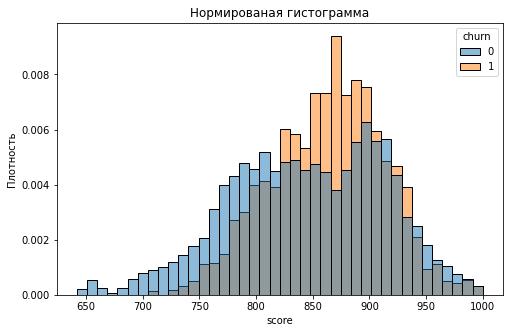

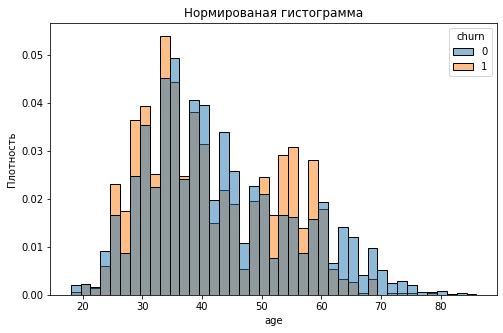

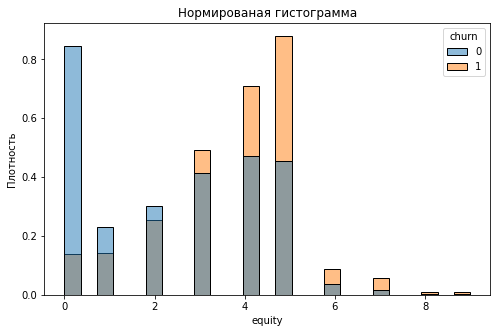

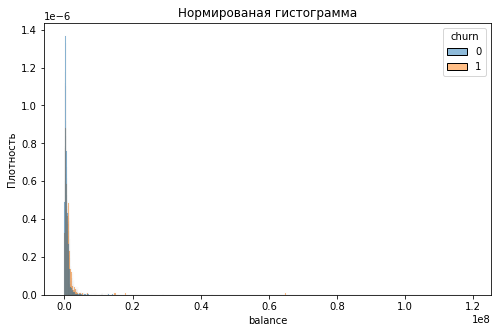

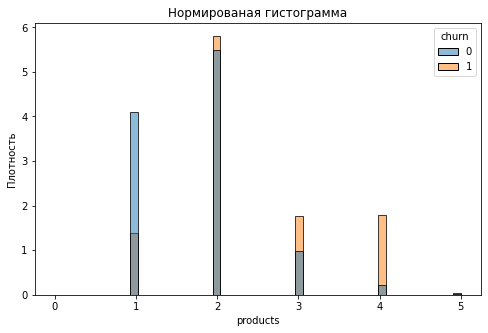

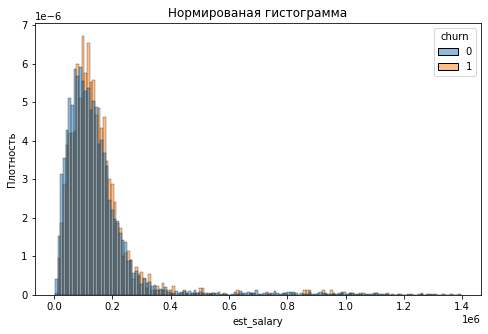

In [32]:
# построим столбчатые диаграммы  и нормированные гистограммы для категориальных признаков
for i in list_dis:
    visionhist(data, i, 'churn')

Рассчитаем процент оттока клиентов в разбивке по продуктам и баллам собственности:

In [33]:
data_pr = data.groupby(data['products'])['churn'].agg(['mean']).reset_index()
data_pr

,products,mean
0,0,1.000000
1,1,0.070719
2,2,0.191053
3,3,0.286127
4,4,0.632911
5,5,0.421053


In [34]:
data[data['products']==0]

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль,city,gender
8957,147837,962,79,3,NaN,0,0,0,25063.96,1,0,1,0,0,1,0,Рыбинск,Ж


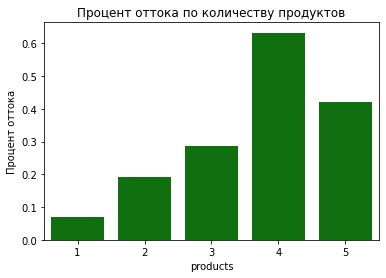

In [35]:
plt.figsize=(8,8)
sns.barplot(x='products', y='mean', data=data_pr.query('products>0'), color='green')
plt.title('Процент оттока по количеству продуктов')
plt.ylabel('Процент оттока')
plt.show()

In [36]:
data_eq = data.groupby(data['equity'])['churn'].agg(['mean']).reset_index()
data_eq

,equity,mean
0,0,0.034938
1,1,0.120310
2,2,0.157945
3,3,0.208955
4,4,0.251218
5,5,0.300783
6,6,0.360248
7,7,0.462500
8,8,0.352941
9,9,0.538462


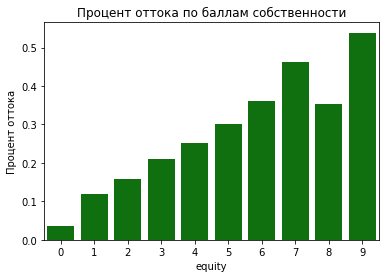

In [37]:
plt.figsize=(8,8)
sns.barplot(x='equity', y='mean', data=data_eq, color='green')
plt.title('Процент оттока по баллам собственности')
plt.ylabel('Процент оттока')
plt.show()


Максимальная доля оттока для клиентов пользующихся 4-5 продуктами банка. Есль один ушедший клиент, у которого не было ни одного продукта багка. Максимальный отток у клиентов с 9 баллами собственности, в целом отток больше 20% у клиентов с баллами собственности выше 3х.


Для клиентов с баллами кредитного скоринга в диапазоне от 820 до 920 вероятность оттока выше, чем у остальных, такая же картина для клиентов с баллами собственности более 3. Чаще уходят клиенты с 2мя продуктами и более. Для возраста, баланса и оценочного дохода построим более читаемые гистограммы.

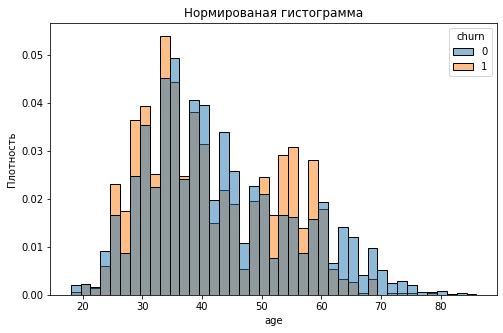

In [38]:
visionhist(data, 'age', 'churn')

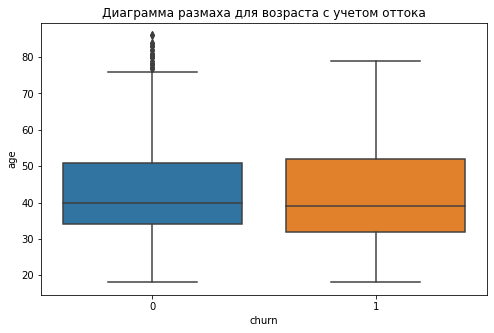

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(y='age', x='churn', data=data)
plt.title('Диаграмма размаха для возраста с учетом оттока')
plt.show()

Теперь явно видно два диапазона для пользователей с большей вероятностью оттока это клиенты 25-35 лет и 50-60 лет, но явная закономерность отсутствует.

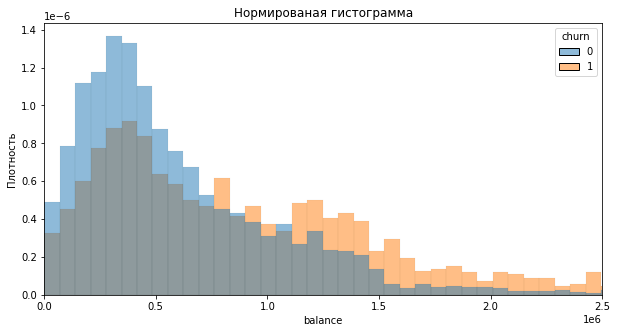

In [40]:
#отфильтруем пустые значения
data_filter_bal = data.query('balance_nan==1')
plt.figure(figsize=(10, 5))
sns.histplot(x='balance', data=data_filter_bal, hue='churn', common_norm=False, stat='density')
plt.xlim(0.0, 2500000)
plt.title('Нормированая гистограмма')
plt.ylabel('Плотность')
plt.show()

Клиенты с баллансом на счете более 1млн уходят чаще.

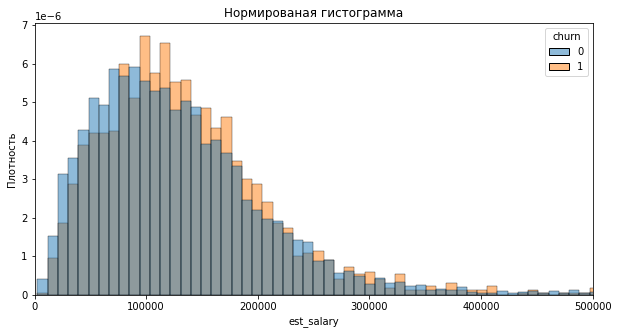

In [41]:
plt.figure(figsize=(10, 5))
sns.histplot(x='est_salary', data=data, hue='churn', common_norm=False, stat='density')
plt.xlim(0.0, 500000)
plt.title('Нормированая гистограмма')
plt.ylabel('Плотность')
plt.show()

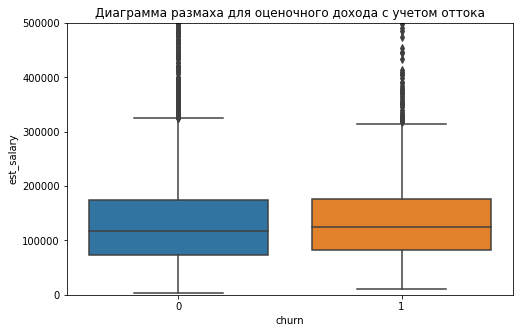

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(y='est_salary', x='churn', data=data)
plt.ylim(0.0, 500000)
plt.title('Диаграмма размаха для оценочного дохода с учетом оттока')
plt.show()

Максимальная вероятность ухода по нормированной гистограмме для оценочного дохода в промежутке от 100тыс до 210тыс, довольно небольшой промежуток, считаем что этот признак тоже можно не использовать для сегментации.

In [43]:
# разобьем датафрейм по количеству продуктов
def categorize_product(p):
    try:
        if p == 1:
            return 'один'
        elif p == 2:
            return 'два'
        elif p >= 3:
            return '3 и больше'
        else:
            return 'нет'
    except:
        pass

In [44]:
# добавим столбец с категориями
data['product_category'] = data['products'].apply(categorize_product)

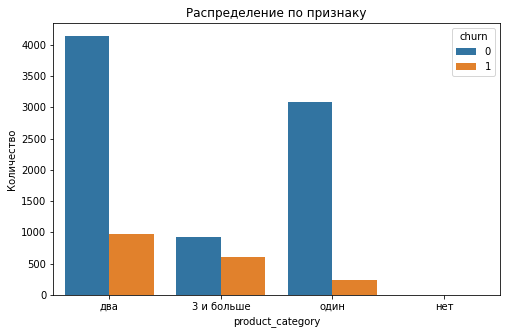

In [45]:
# построим столбчатую диаграмму для категорий продуктов
visionbar(data, 'product_category', 'churn')

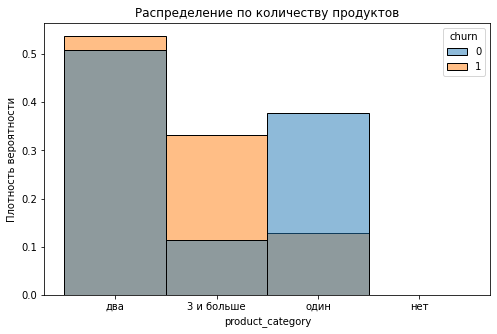

In [46]:
#  построим нормированную гистограмму для количества продуктов
plt.figure(figsize=(8, 5))
sns.histplot(x='product_category', hue ='churn', data=data, common_norm=False, stat='density')
plt.title('Распределение по количеству продуктов')
plt.ylabel('Плотность вероятности')
plt.show()

Вероятность оттока значительно больше для клиентов с тремя продуктами и более.

    Вывод: 
    Процент оттока = среднее по столбцу "churn" и составляет почти 18%. Так же в датафрейме распределение клиентов по полу 50/50, клиентов из Ростова 14%, Рыбинска 27% и из Ярославля 59%. При этом 67% клиентов имеют кредитные карты и 52% это активные клиенты. 
    Так же у баланса и дохода достаточно сильно отличаются среднее и медианное значение, скорее всего из-за выбросов и незаполненных данных.
    Проценты имеющих кредитную карту и активность отличаются среди ушедних и оставшихся клиентов, так же как и распределение по полу. Получается, что среди отточных клиентов больше мужчин и активных пользователей. А вот распределение по городам среди ушедших и оставшихся почти такое же как и по всему датафрейму.Больше всего ушедших из Ярославля, но и общее количество клиентов в Ярославле сильно больше по сравнению с другими городами. Среди клиентов с незаполненным балансом на счете практически нет ушедших клиентов.
    Для клиентов с баллами кредитного скоринга в диапазоне от 820 до 920 вероятность оттока выше, чем у остальных, такая же картина для клиентов с баллами собственности более 3. Чаще уходят клиенты с 2мя продуктами и более. Нашли два диапазона для пользователей с большей вероятностью оттока это клиенты 25-35 лет и 50-60 лет. Клиенты с баллансом на счете более 1млн уходят чаще. Максимальная вероятность ухода для оценочного дохода в промежутке от 100тыс до 210тыс. Вероятность оттока значительно больше для клиентов с тремя продуктами и более.

<a id = '10-bullet'></a>
##### Корреляционный анализ.

In [47]:
#  матрица корреляции
data_corr = data.corr()
data_corr

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль
user_id,1.000000,0.008778,0.017795,0.005837,0.005479,-0.003175,0.005001,-0.032022,-0.001103,-0.010865,-0.002417,-0.030335,0.030335,-0.032729,0.013567,0.010990
score,0.008778,1.000000,-0.011814,0.064809,0.235283,-0.004071,-0.095261,-0.030343,0.164166,0.106404,-0.138762,-0.011229,0.011229,-0.037573,-0.000789,0.027365
age,0.017795,-0.011814,1.000000,0.020628,0.069745,0.017182,-0.123128,-0.008157,-0.039598,-0.049797,0.028659,0.212821,-0.212821,0.046985,0.029453,-0.059876
equity,0.005837,0.064809,0.020628,1.000000,0.163793,0.430945,-0.167271,-0.002011,-0.171515,0.270084,0.709036,0.020815,-0.020815,0.035364,-0.004973,-0.020604
balance,0.005479,0.235283,0.069745,0.163793,1.000000,0.075716,-0.059850,0.024770,0.338800,0.085915,NaN,-0.051271,0.051271,-0.035635,-0.034420,0.056967
products,-0.003175,-0.004071,0.017182,0.430945,0.075716,1.000000,-0.251120,0.037555,-0.117556,0.300621,0.486232,0.022131,-0.022131,-0.006884,-0.042255,0.042967
credit_card,0.005001,-0.095261,-0.123128,-0.167271,-0.059850,-0.251120,1.000000,-0.033173,0.036006,-0.130388,-0.157637,-0.126088,0.126088,-0.098002,-0.050363,0.114911
last_activity,-0.032022,-0.030343,-0.008157,-0.002011,0.024770,0.037555,-0.033173,1.000000,0.002944,0.169420,-0.028400,0.013084,-0.013084,0.007264,0.048512,-0.048876
est_salary,-0.001103,0.164166,-0.039598,-0.171515,0.338800,-0.117556,0.036006,0.002944,1.000000,0.001705,-0.306957,-0.082572,0.082572,-0.105923,-0.056671,0.126215
churn,-0.010865,0.106404,-0.049797,0.270084,0.085915,0.300621,-0.130388,0.169420,0.001705,1.000000,0.248984,-0.141644,0.141644,0.005028,-0.030628,0.024038


Text(0.5, 1.0, 'Матрица корреляций')

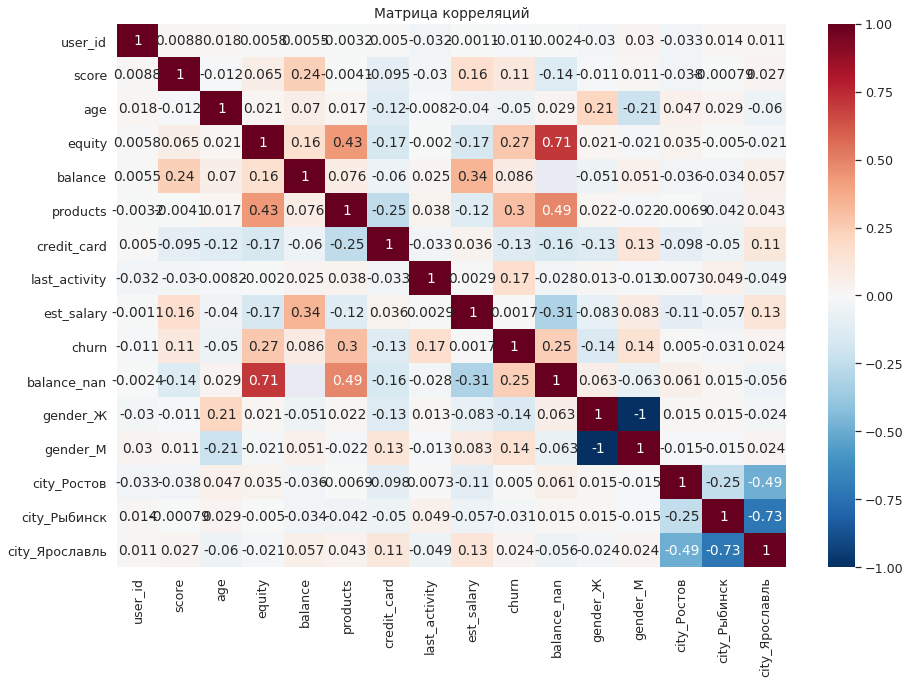

In [48]:
# построим тепловую карту корреляции
sns.set(font_scale=1.15)
plt.figure(figsize=(15,10))
sns.heatmap(
    data.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1)
plt.title('Матрица корреляций')

Самая большая корреляция между бинарными столбцами с указанием пола и бинарные столбцы с городами. Так же большая корреляция между баллами собственности, столбцом с метками о пустых значениях баланса, количеством продуктов и признаком оттока.

Text(0.5, 1.0, 'Корреляция для признака оттока')

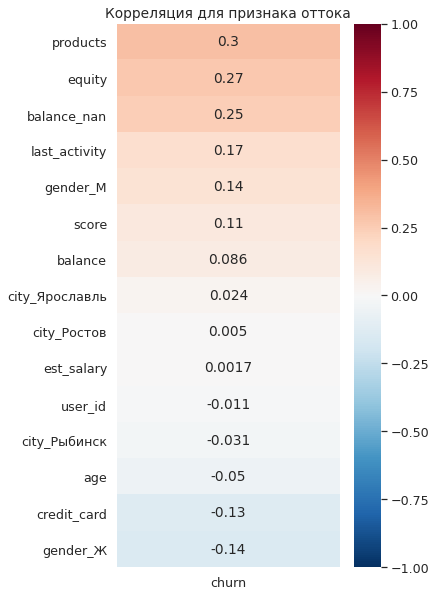

In [49]:
sns.set(font_scale=1.15)
plt.figure(figsize=(5,10))
sns.heatmap(data_corr[['churn']].sort_values(by='churn', ascending=False).drop('churn'),  
            cmap='RdBu_r', 
            annot=True, 
            vmin=-1, vmax=1)
plt.title('Корреляция для признака оттока')

Самая большая корреляция у признака оттока с количеством продуктов, баллами недвижимости и столбцом с признаком незаполненного баланса.

<a id = '11-bullet'></a>
##### Выбор наиболее значимых метрик.

Для клиентов с баллами кредитного скоринга в диапазоне от 820 до 920 вероятность оттока выше, чем у остальных. Клиенты с баллансом на счете более 1млн уходят чаще. Посчитаем количество таких клиентов и оценим уровень отточности в этих диапазонах. 

In [50]:
#количество клиентов с балансом больше 1млн
data.query('balance>1000000').shape[0]

1873

In [51]:
# уровень оттока для клиентов с балансом более 1млн
data.query('balance>1000000')['churn'].mean()

0.38547784303256805

In [52]:
# количество клиентов с баллами скоринга 820-920
data.query('score>820 & score<920').shape[0]

5215

In [53]:
# уровень оттока для клиентов с баллами скоринга 820-920
data.query('score>820 & score<920')['churn'].mean()

0.23298178331735378

Т.к. клиентов с такими баллами достаточно много и уровень отточности не сильно выше чем по датафрейму, проверим использование этого признака статистически. 
На основании визуализаций и матрицы корреляции, можно утверждать что на отток клиентов в большей степени влияет признак пола, активность, количество используемых продуктов банкa, баллы собственности, баланс на счете.


#### Часть 3. Проверка статестических гипотез.

<a id = '12-bullet'></a>
##### Гипотеза различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

    Нулевая гипотеза: средний возраст для клиентов, пользующихся одним продуктом равен среднему возрасту пользующихся двумя. 
    Альтернативная гипотеза: средний возраст для клиентов, пользующихся одним продуктом не равен среднему возрасту пользующихся двумя.

In [54]:
#разобьем датафрейм на две части по количеству используемых продуктов банка (с учетом заглушки по возрасту)
data_p1 = data.query('products==1 & age>0')
data_p2 = data.query('products==2 & age>0')
print('Средний возраст для 1 продукта', data_p1['age'].mean())
print('Средний возраст для 2х продуктов', data_p2['age'].mean())

Средний возраст для 1 продукта 42.19620824556124
Средний возраст для 2х продуктов 42.76890017581559


Применим Т-тест двусторонний для двух независимых выборок

    t-тест, можно применять, если:
    * Генеральные совокупности не зависят друг от друга. В нашем случае у нас две выборки из одного датафрейма с разным количеством используемых продуктов.
    * Выборочные средние нормально распределены. Если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности. Это так, даже если сама генеральная совокупность не распределена нормально.
    * Дисперсии рассматриваемых генеральных совокупностей равны. Если это не так, то можно использовать параметр equal_var = False.



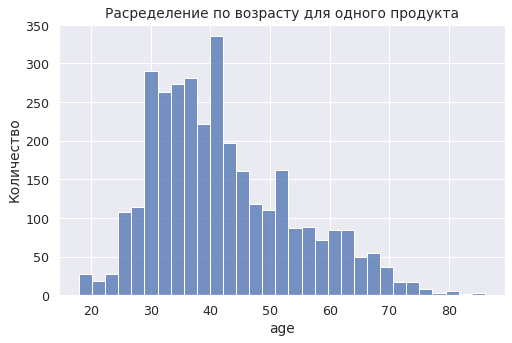

In [55]:
plt.figure(figsize=(8, 5))
sns.histplot(x='age', data=data_p1)
plt.title('Расределение по возрасту для одного продукта')
plt.ylabel('Количество')
plt.show()

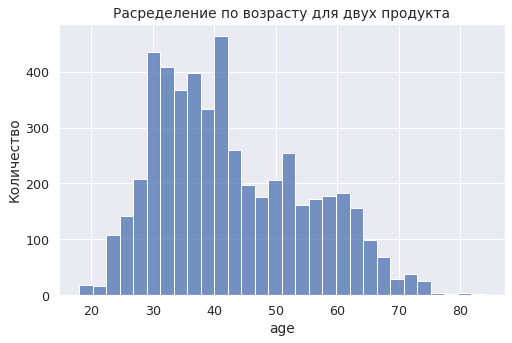

In [56]:
plt.figure(figsize=(8, 5))
sns.histplot(x='age', data=data_p2)
plt.title('Расределение по возрасту для двух продукта')
plt.ylabel('Количество')
plt.show()

In [57]:
print('Дисперсия для 1 продукта', data_p1['age'].var())
print('Дисперсия для 2х продуктов', data_p2['age'].var())

Дисперсия для 1 продукта 143.6857532281439
Дисперсия для 2х продуктов 147.807660982413


Дисперсии незначительно различаются, добавим аргумент equal_var = False

In [58]:
alpha = 0.05

# проводим ttest для двух выборок
results = st.ttest_ind(data_p1['age'], data_p2['age'], equal_var = False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.03299080704232691
Отвергаем нулевую гипотезу


<a id = '13-bullet'></a>
##### Гипотеза различия баллов кредитного скоринга между теми клиентами, которые ушли и теми, что остались.

    Нулевая гипотеза: средний балл скоринга для ушедших клиентов равен среднему баллу оставшихся клиентов. 
    Альтернативная гипотеза: средний балл скоринга для ушедших клиентов неравен среднему баллу оставшихся клиентов.

In [59]:
#разобьем датафрейм на две части по признаку оттока
data_churn = data.query('churn==1')
data_notchurn = data.query('churn==0')
print('Средний балл скоринга для ушедших', data_churn['score'].mean())
print('Средний балл скоринга для оставшихся', data_notchurn['score'].mean())

Средний балл скоринга для ушедших 863.416162726773
Средний балл скоринга для оставшихся 845.3961986511342


Применим Т-тест двусторонний для двух независимых выборок

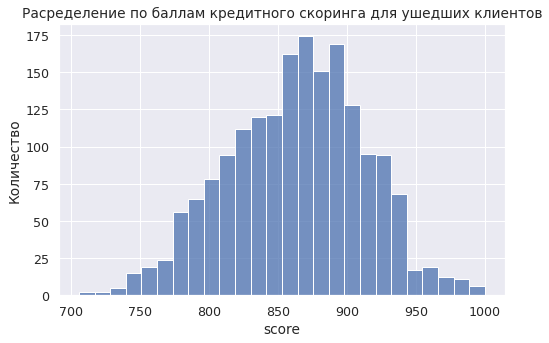

In [60]:
plt.figure(figsize=(8, 5))
sns.histplot(x='score', data=data_churn)
plt.title('Расределение по баллам кредитного скоринга для ушедших клиентов')
plt.ylabel('Количество')
plt.show()

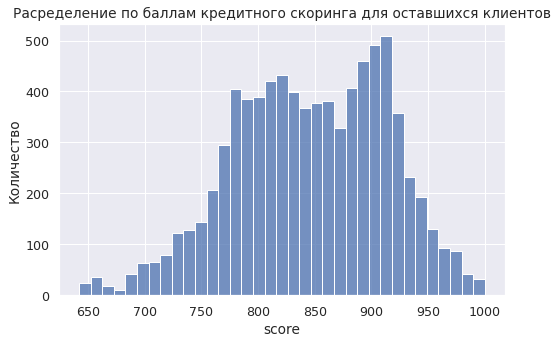

In [61]:
plt.figure(figsize=(8, 5))
sns.histplot(x='score', data=data_notchurn)
plt.title('Расределение по баллам кредитного скоринга для оставшихся клиентов')
plt.ylabel('Количество')
plt.show()

In [62]:
print('Дисперсия для ушедших клиентов', data_churn['score'].var())
print('Дисперсия для оставшихся клиентов', data_notchurn['score'].var())

Дисперсия для ушедших клиентов 2462.242004849193
Дисперсия для оставшихся клиентов 4623.062654176869


In [63]:
alpha = 0.05

# проводим ttest для двух выборок
results = st.ttest_ind(data_churn['score'], data_notchurn['score'], equal_var = False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 8.60332714629934e-38
Отвергаем нулевую гипотезу


Вывод: На основании проверки статистической гипотезы установили, что средний возраст для 1 или 2х продуктов отличается. 
Так же как и средний балл кредитного скоринга для ушедших и оставшихся клиентов статистически различается.

<a id = '14-bullet'></a>
#### Часть 4. Промежуточные итоги.

    При обработке данных выявили большое количество пропусков в столбце баланс, возможно это означает нулевой баланс. Также обнаружили небольшое количество незаполненных данных в колонке возраста. И небольшое количество дубликатов идентификатора Скорее всего имеют место быть некоторые проблемы при заполнении данных. Рекомендуется обратить внимание на наличие технических ошибок при заполнении/выгрузке данных.
    Процент оттока по всем составляет почти 18%. Распределение клиентов по полу 50/50, при этом клиентов из Ростова 14%, Рыбинска 27% и из Ярославля 59%. Так же 67% клиентов имеют кредитные карты и 52% это активные клиенты. 
    Среди отточных клиентов больше мужчин и активных пользователей. А вот распределение по городам у ушедших клиентов совпадает с распределением по всему датафрейму. Среди клиентов с незаполненным балансом на счете практически нет ушедших клиентов.
    Для клиентов с баллами кредитного скоринга в диапазоне от 820 до 920 вероятность оттока выше, чем у остальных, такая же картина для клиентов с баллами собственности более 3. Чаще уходят клиенты с 3мя продуктами и более. Клиенты с баллансом на счете более 1млн уходят чаще.
    На основании визуализаций и матрицы корреляции, а так же на основании проверки статистических гипотез считаем, что на отток клиентов в большей степени влияет признак пола, возраст, количество используемых продуктов банкa, баллы собственности.

#### Часть 5. Сегментация клиентов.

<a id = '15-bullet'></a>
##### Выбор метрик для сегментации.

Оставим для сегментации признаки по количеству продуктов банка,  полу, возрасту, баллам собственности. 

In [64]:
# введем категории по возрасту
def categorize_age(p):
    try:
        if p < 35:
            return 'моложе 35'
        elif 35 <= p <= 50:
            return 'возраст 35-50'
        else:
            return 'старше 50'
    except:
        pass

In [65]:
# введем категории по баллам собственности
def categorize_equity(p):
    try:
        if p < 3:
            return '0-2'
        elif 3 <= p < 5:
            return '3-4'
        else:
            return '5 и более'
    except:
        pass

In [66]:
# добавим столбцы с категориями
data['age_category'] = data['age'].apply(categorize_age)
data['equity_category'] = data['equity'].apply(categorize_equity)

<a id = '16-bullet'></a>
##### Разделение клиентов по сегментам.

Выберем по одному сегменту для клиентов с 1им, 2мя и более 3х продуктов банка. Для этого построим сводные таблицы в разрезе выбранных признаков

In [67]:
pd.pivot_table(data.query('products==1'),
               index=["age_category"],
               columns=["equity_category"],
               values=["churn"],
               aggfunc=[np.mean, len])

mean                       len               
                    churn                     churn               
equity_category       0-2       3-4 5 и более   0-2  3-4 5 и более
age_category                                                      
возраст 35-50    0.032114  0.097122  0.169697  1121  278       165
моложе 35        0.025000  0.218391  0.288889   720  174        90
старше 50        0.049645  0.160584  0.162162   564  137        74

Для одного продукта характерен низкий уровень оттока, самый низкий уровень оттока у клиентов моложе 35 лет и имеющих баллы собственности 0-2

In [68]:
pd.pivot_table(data.query('products==2'),
               index=["age_category"],
               columns=["equity_category"],
               values=["churn"],
               aggfunc=[np.mean, len])

mean                       len               
                    churn                     churn               
equity_category       0-2       3-4 5 и более   0-2  3-4 5 и более
age_category                                                      
возраст 35-50    0.085366  0.164823  0.236111   738  904       576
моложе 35        0.128257  0.258320  0.356410   499  631       390
старше 50        0.126386  0.221269  0.224784   451  583       347

А вот для двух продуктов банка самый высокий процент оттока у людей моложе 35 лет, но при этом имеющие баллы собственности выше 3х

In [69]:
pd.pivot_table(data.query('products>=3'),
               index=["gender"],
               columns=["equity_category"],
               values=["churn"],
               aggfunc=[np.mean, len])

mean                       len               
                    churn                     churn               
equity_category       0-2       3-4 5 и более   0-2  3-4 5 и более
gender                                                            
Ж                0.226744  0.285340  0.360000   172  382       225
М                0.325926  0.496644  0.576803   135  298       319

Среди клиентов пользующихся тремя и более продуктов банка самый высокий отток у мужчин с баллами собственности выше 3х.

<a id = '17-bullet'></a>
##### Расчет основных показателей сегментов.

In [70]:
#Сегмент 1
data_1 = data.query('products==1 & age<35 & equity<=2')
print('Размер сегмента', data_1.shape[0])
print('Доля оттока', data_1['churn'].mean().round(2))
print('Доля кредитных карт', data_1['credit_card'].mean().round(2))

Размер сегмента 720
Доля оттока 0.02
Доля кредитных карт 0.9


In [71]:
data_1.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль
count,720.000000,720.000000,720.000000,720.000000,1.340000e+02,720.0,720.000000,720.000000,7.200000e+02,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,170106.061111,860.198611,29.644444,0.263889,2.005124e+05,1.0,0.902778,0.545833,1.700639e+05,0.025000,0.186111,0.354167,0.645833,0.108333,0.241667,0.650000
std,33160.541550,84.858391,3.731417,0.591856,2.493339e+05,0.0,0.296466,0.498241,1.745480e+05,0.156233,0.389467,0.478592,0.478592,0.311017,0.428391,0.477301
min,114182.000000,648.000000,18.000000,0.000000,2.000000e+01,1.0,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140648.500000,799.750000,27.000000,0.000000,7.795307e+04,1.0,1.000000,0.000000,8.196720e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,170936.500000,897.000000,31.000000,0.000000,1.284758e+05,1.0,1.000000,1.000000,1.230745e+05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,198222.500000,920.000000,33.000000,0.000000,2.275013e+05,1.0,1.000000,1.000000,1.844375e+05,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,229054.000000,988.000000,34.000000,2.000000,2.120560e+06,1.0,1.000000,1.000000,1.333687e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
#Сегмент 2
data_2 = data.query('products==2 & age<35 & equity>=5')
print('Размер сегмента', data_2.shape[0])
print('Доля оттока', data_2['churn'].mean().round(2))

Размер сегмента 390
Доля оттока 0.36


In [73]:
data_2.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль
count,390.000000,390.000000,390.000000,390.000000,3.900000e+02,390.0,390.000000,390.000000,3.900000e+02,390.000000,390.0,390.000000,390.000000,390.000000,390.000000,390.000000
mean,168535.546154,867.948718,29.982051,5.166667,9.135490e+05,2.0,0.589744,0.600000,1.251579e+05,0.356410,1.0,0.425641,0.574359,0.123077,0.292308,0.584615
std,35667.502579,51.252261,3.019591,0.560404,1.481975e+06,0.0,0.492512,0.490527,1.379252e+05,0.479554,0.0,0.495075,0.495075,0.328947,0.455407,0.493421
min,96404.000000,742.000000,19.000000,5.000000,9.459770e+03,2.0,0.000000,0.000000,1.615890e+04,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136220.000000,832.000000,28.000000,5.000000,4.221446e+05,2.0,0.000000,0.000000,5.837892e+04,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,168725.500000,873.500000,31.000000,5.000000,6.400430e+05,2.0,1.000000,1.000000,9.210946e+04,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000
75%,199210.250000,904.000000,32.000000,5.000000,9.506988e+05,2.0,1.000000,1.000000,1.419336e+05,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000
max,228908.000000,1000.000000,34.000000,9.000000,1.975718e+07,2.0,1.000000,1.000000,1.108270e+06,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
#Сегмент 3
data_3 = data.query('products>=3 & gender_М==1 & equity>2 & age>30')
print('Размер сегмента', data_3.shape[0])
print('Доля оттока', data_3['churn'].mean().round(2))

Размер сегмента 527
Доля оттока 0.55


In [75]:
data_3.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль
count,527.000000,527.000000,527.000000,527.000000,5.270000e+02,527.000000,527.000000,527.000000,5.270000e+02,527.000000,527.0,527.0,527.0,527.000000,527.000000,527.000000
mean,177540.944972,860.933586,43.635674,4.512334,1.469012e+06,3.442125,0.542694,0.554080,1.602840e+05,0.546490,1.0,0.0,1.0,0.102467,0.206831,0.690702
std,35776.524716,55.286476,9.322491,0.997783,2.475270e+06,0.523197,0.498647,0.497539,1.418699e+05,0.498307,0.0,0.0,0.0,0.303549,0.405418,0.462643
min,97557.000000,731.000000,31.000000,3.000000,6.300000e+01,3.000000,0.000000,0.000000,2.427449e+04,0.000000,1.0,0.0,1.0,0.000000,0.000000,0.000000
25%,149604.500000,819.500000,36.000000,4.000000,5.373871e+05,3.000000,0.000000,0.000000,8.555035e+04,0.000000,1.0,0.0,1.0,0.000000,0.000000,0.000000
50%,179928.000000,860.000000,41.000000,5.000000,1.000412e+06,3.000000,1.000000,1.000000,1.287067e+05,1.000000,1.0,0.0,1.0,0.000000,0.000000,1.000000
75%,211411.000000,901.000000,51.000000,5.000000,1.577783e+06,4.000000,1.000000,1.000000,1.880382e+05,1.000000,1.0,0.0,1.0,0.000000,0.000000,1.000000
max,229058.000000,989.000000,72.000000,9.000000,4.327710e+07,5.000000,1.000000,1.000000,1.363550e+06,1.000000,1.0,0.0,1.0,1.000000,1.000000,1.000000


Выделили три сегмента для каждой группы по количеству продуктов. 
* 1 сегмент с низким оттоком это молодые люди до 35 лет, пользующиеся одним продуктом банка (в 90% случаев это кредитная карта) и имеющие довольно низкие баллы собственности
* 2 сегмент это клиенты пользующиеся двумя продуктами моложе 35 лет, но имеющие высокие баллы собственности, отток в этом сегменте больше 30%
* 3 сегмент мужчины старше 30 лет пользующиеся тремя и более продуктами банка и имеющие баллы собственности больше 2х, у этого сегмента самый высокий процент оттока- больше половины клиентов

<a id = '18-bullet'></a>
#### Часть 6. Выводы и рекомендации.

    В ходе работы провели обработку датафрейма, исследовали признаки клиентов банка, проверку статистических гипотез. Так же выделили основные признаки, влияющие на отток клиентов, по ним выделили несколько сегментов клиентов для разного количества используемых продуктов. 
    Для клиентов, использующих один продукт отток минимальный, при этом самый маленький отток у держателей кредитных карт молодых людей с минимальным количеством собственности, либо в принципе ее отсутствием, понятно что такие клиенты не склонны уходить из банка, т.к их держат кредитные обязательства, но в таком случае тоже можно улучшить уровень обслуживания клиентов, за счет дополнительных "плюшек" для кредитной карты, предложить добавить другие продукты банка, например, дебетовая карта, страховка и прочее. 
    Для клиентов, использующих два продукта отток увеличивается до 30%. Склонны уходить из банка молодые люди до 35, с более высокими баллами собственности, вероятно это происходит после выплаты кредита, тут опять же можно попытаться удержать клиента выгодными предложениями по некредитным продуктам, наприм кешбек по карте, возможно рассмотреть более удобное и продвинутое мобильное приложение банка.
    Для клиентов использующих более трех продуктов, отток значительно выше. Для выделенного сегмента мужчин старше 30 и имеющих баллы собственности более или равно 3 отток составляет более 50%. Тут рекомендуется поддтянуть интересные предложение по накопительным/инвестиционным продуктам.
    Так же стоит рассмотреть вариант более расширенного набора данных (виды используемых продуктов банка, персонализированные данные клиентов), для более детального изучения причин оттока клиентов.